# CSML1020 Course Project - New Plant Diseases Dectection
## Authors (Group 3): Paul Doucet, Jerry Khidaroo

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Initialization

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

In [3]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [4]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

## Data Preparation

In [5]:
# List of all directories and file counts in given path
def getDirCounts(dirName):
    listOfFile = os.listdir(dirName)
    rows = []
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            fields = entry.split("___")
            if fields[1] == 'healthy':
                status = 'healthy'
            else:
                status = "unhealthy"
            
            disease = fields[1].split("_")[-1].replace(")","").lower()
            
            noOfFiles = sum([len(files) for r, d, files in os.walk(fullPath)])
            rows.append([fields[0], fields[1], noOfFiles, status, disease])

    df = pd.DataFrame(rows, columns=["plant", "condition", "count", "status", "disease"])
    #df['plant_status'] = df['plant'] + ' - ' + df['status']
    return df

In [6]:
dataDirTrain = '../input/newplantdiseasessample/NewPlantDiseasesDatasetSample/train'
dataDirValidate = '../input/newplantdiseasessample/NewPlantDiseasesDatasetSample/valid'
dataDirTest = '../input/newplantdiseasessample/NewPlantDiseasesDatasetSample/test'

In [7]:
# Get the list of all files in directory tree at given path
plants_df = getDirCounts(dataDirTrain)
plants_df

,plant,condition,count,status,disease
0,Tomato,Target_Spot,50,unhealthy,spot
1,Tomato,Early_blight,50,unhealthy,blight
2,Apple,healthy,50,healthy,healthy
3,Tomato,healthy,50,healthy,healthy
4,Blueberry,healthy,50,healthy,healthy
5,Grape,healthy,50,healthy,healthy
6,Peach,healthy,50,healthy,healthy
7,Cherry_(including_sour),Powdery_mildew,50,unhealthy,mildew
8,Tomato,Leaf_Mold,50,unhealthy,mold
9,Apple,Black_rot,50,unhealthy,rot


## Data Importing

In [8]:
import tensorflow as tf


In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, True)

In [10]:
from keras.applications.vgg16 import VGG16
import keras
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


## Data Pre-Processing

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 48

training_set = train_datagen.flow_from_directory(dataDirTrain,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(dataDirValidate,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 1900 images belonging to 38 classes.
Found 1900 images belonging to 38 classes.


In [12]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato_

In [13]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 'Corn_(maize)___Common_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Tomato___Target_Spo

In [14]:
train_num = training_set.samples
valid_num = valid_set.samples

---

## Custom Model From Scratch

In [15]:
# 1-vgg block baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [16]:
# define cnn model
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
classifier.add(Dense(38, activation='softmax'))


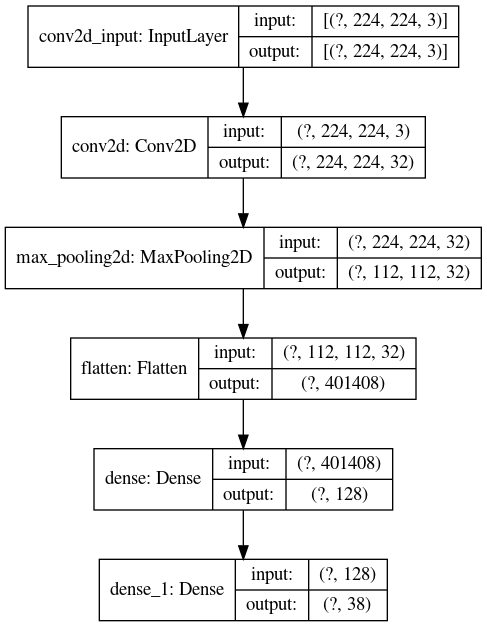

In [17]:
dot_img_file = '/tmp/model_baseline.png'
tf.keras.utils.plot_model(classifier, to_file=dot_img_file, show_shapes=True)

In [18]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.2.0


In [19]:
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=3,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/3
39/39 [==============================] - 38s 962ms/step - loss: 58.3906 - accuracy: 0.0329 - val_loss: 3.6369 - val_accuracy: 0.0278
Epoch 2/3
39/39 [==============================] - 32s 812ms/step - loss: 3.6370 - accuracy: 0.0254 - val_loss: 3.6343 - val_accuracy: 0.0294
Epoch 3/3
39/39 [==============================] - 32s 823ms/step - loss: 3.6329 - accuracy: 0.0292 - val_loss: 3.6415 - val_accuracy: 0.0374


In [21]:
#Saving our model
filepath="./Mymodel_Baseline.h5"
classifier.save(filepath)

In [22]:
def get_model():
    classifier = Sequential()
    classifier.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
    classifier.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
    classifier.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
    classifier.add(MaxPooling2D((2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    classifier.add(Dense(38,activation='softmax'))
    
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return classifier

In [23]:
def Save_Benchmark(descr, metric, reset_rb, init_rb):
    global rows_benchmarks
    #global rows_benchmarks_all
    global df_benchmarks
    #global df_benchmarks_all
    # if (rows_benchmarks == None):
    #     rows_benchmarks = []
    if (init_rb):
        rows_benchmarks = []
    else:
        if (reset_rb):
            rows_benchmarks = []

        # if (reset_rb_all):
        #     rows_benchmarks_all = []
        rows_benchmarks.append([descr, metric])
        #rows_benchmarks_all.append([descr, metric])
        df_benchmarks = pd.DataFrame(rows_benchmarks, columns=["Preprosessing Steps", "accuracy"])
        #df_benchmarks_all = pd.DataFrame(rows_benchmarks_all, columns=["Preprosessing Steps", "accuracy"])


In [24]:
def run_model(train_datagen, valid_set, batch_size, epochs):    
    training_set = train_datagen.flow_from_directory(dataDirTrain, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

    train_num = training_set.samples
    valid_num = valid_set.samples

    classifier = get_model()
    
    #fitting images to CNN
    history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=epochs, validation_steps=valid_num//batch_size)

    return history

In [25]:
dg_descrs = ["rescale=1./255", 
    #"rescale=1./255, shear_range=0.2", 
    #"rescale=1./255, zoom_range=0.2", 
    #"rescale=1./255, width_shift_range=0.2", 
    #"rescale=1./255, width_shift_range=0.2",
    #"rescale=1./255, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2",
    #"rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=90, brightness_range=[0.2,1.0], zoom_range=[0.5,1.0]"
]

datagens = [
    ImageDataGenerator(rescale=1./255, fill_mode='nearest'),
    #ImageDataGenerator(rescale=1./255, shear_range=0.2, fill_mode='nearest'),
    #ImageDataGenerator(rescale=1./255, zoom_range=0.2, fill_mode='nearest'),
    #ImageDataGenerator(rescale=1./255, width_shift_range=0.2, fill_mode='nearest'),
    #ImageDataGenerator(rescale=1./255, height_shift_range=0.2, fill_mode='nearest'),
    #ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest'),
    #ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=90, brightness_range=[0.2,1.0], zoom_range=[0.5,1.0], fill_mode='nearest'),
]


batch_size = 48
epochs = 20
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_set = valid_datagen.flow_from_directory(dataDirValidate, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
Save_Benchmark("", "", False, True)

for train_datagen, dg_descr in zip(datagens, dg_descrs):
    history = run_model(train_datagen, valid_set, batch_size, epochs)
    #history.history
    Save_Benchmark(dg_descr, history.history['val_accuracy'][2], False, False)

df_benchmarks

Found 1900 images belonging to 38 classes.
Found 1900 images belonging to 38 classes.
Epoch 1/20
39/39 [==============================] - 18s 462ms/step - loss: 47.7810 - accuracy: 0.0745 - val_loss: 3.2523 - val_accuracy: 0.1763
Epoch 2/20
39/39 [==============================] - 17s 447ms/step - loss: 2.2540 - accuracy: 0.4044 - val_loss: 2.4444 - val_accuracy: 0.3440
Epoch 3/20
39/39 [==============================] - 18s 458ms/step - loss: 0.7224 - accuracy: 0.8180 - val_loss: 2.9562 - val_accuracy: 0.3558
Epoch 4/20
39/39 [==============================] - 18s 450ms/step - loss: 0.2169 - accuracy: 0.9444 - val_loss: 3.0560 - val_accuracy: 0.4241
Epoch 5/20
39/39 [==============================] - 17s 440ms/step - loss: 0.0846 - accuracy: 0.9806 - val_loss: 3.4122 - val_accuracy: 0.3953
Epoch 6/20
39/39 [==============================] - 18s 467ms/step - loss: 0.0492 - accuracy: 0.9919 - val_loss: 3.4456 - val_accuracy: 0.4209
Epoch 7/20
39/39 [==============================] - 18s

,Preprosessing Steps,accuracy
0,rescale=1./255,0.36
1,"rescale=1./255, shear_range=0.2",0.40


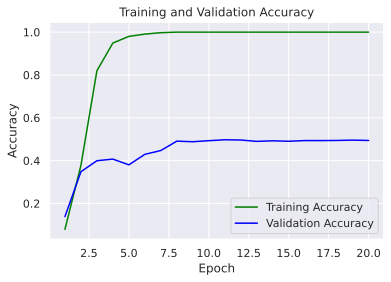

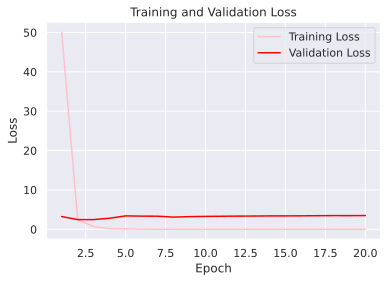

In [26]:
# import matplotlib.pyplot as plt
# import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Inference - Baseline

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../input/newplantdiseasessample/NewPlantDiseasesDatasetSample/test/CornCommonRust1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()